In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import warnings

warnings.filterwarnings(action='ignore')
rc('font',family='AppleGothic')
rcParams['axes.unicode_minus'] = False

In [2]:
path = './data/'

train = pd.read_csv(path+"train_preprocessed.csv")
train_errx = pd.read_csv(path+"train_errx_preprocessed.csv")
test = pd.read_csv(path+"test_preprocessed.csv")
sub = pd.read_csv(path + 'sample_submission.csv')

train.shape, train_errx.shape, test.shape

((2952, 62), (2896, 62), (1008, 61))

## train, test 데이터 세트 합치기

In [3]:
all_df = pd.concat([train.drop("등록차량수",axis=1), test])
print(all_df.shape)
print(all_df.iloc[:,:13].isnull().sum() )

all_df.iloc[:,:13].head(8)

(3960, 61)
단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       767
임대료         776
지하철         249
버스정류장         0
dtype: int64


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0
5,ERR04_2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000.0,184330.0,0.0,3.0
6,ERR04_2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000.0,184330.0,0.0,3.0
7,ERR04_2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000.0,214270.0,0.0,3.0


In [4]:
# 임대보증금과 임대료 결측치 없는 데이터셋을 train_new로
train_new = all_df[(all_df['임대보증금'].notnull()) & (all_df['임대료'].notnull())]

# 임대보증금과 임대료 결측치 하나라도 있는 데이터셋을 test_new로
test_new = all_df[(all_df['임대보증금'].isnull())|(all_df['임대료'].isnull())]

# 합쳐서 갯수가 맞아야함
print(all_df.shape)
print(train_new.shape, test_new.shape)
print(all_df.shape[0] == train_new.shape[0]+test_new.shape[0])

(3960, 61)
(3184, 61) (776, 61)
True


## 결측치 시각화

<AxesSubplot:>

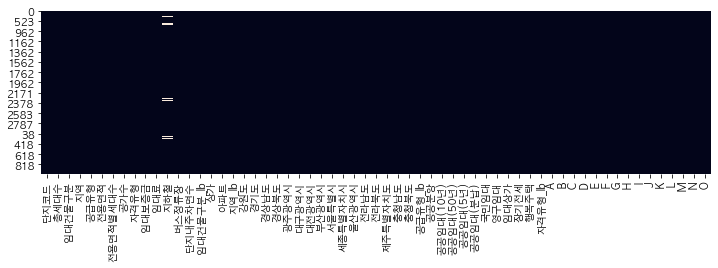

In [5]:
# train 셋에 임대료와 임대보증금에 대한 결측치가 없어야한다.
plt.figure(figsize=(12,3))
sns.heatmap(train_new.isnull(), cbar=False)

<AxesSubplot:>

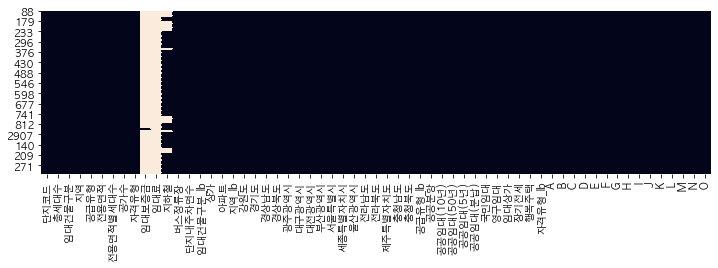

In [6]:
# test 셋에는 임대보증금과 임대료에 대해 결측치가 많다.
plt.figure(figsize=(12,3))
sns.heatmap(test_new.isnull(), cbar=False)

## csv 파일로 저장

In [7]:
outpath = './data_임대보증금임대료/'

train_new.to_csv(outpath + "train_new.csv", index=False)
test_new.to_csv(outpath + 'test_new.csv', index=False)
os.listdir(outpath)


['train_new.csv', 'test_new.csv']